<a href="https://colab.research.google.com/github/jonatahpfg/Machine-learning-estudos/blob/main/Predi%C3%A7%C3%A3o_popularidade_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv('archive (7).zip')

df = df.dropna()


In [112]:
df_sorted = df.sort_values('popularity', ascending=False)

# Identificar as músicas duplicadas com base nas colunas de critério de duplicidade
duplicated_songs = df_sorted.duplicated(subset=['track_name', 'artist_name'], keep='first')
df= df_sorted[~duplicated_songs]



In [113]:
df = df[df['popularity'] > 1]

In [114]:
artist_popularity_mean = df.groupby('artist_name')['popularity'].mean()

# Substitui o nome do artista pela média da popularidade, pois a popularidade do artista é um fator importante na predição do sucesso de uma
df['artist_name'] = df['artist_name'].map(artist_popularity_mean)


In [115]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe_transform = ohe.fit_transform(df[["genre"]])
ohe_transform.toarray()




array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [116]:
df_ohe = pd.DataFrame(ohe_transform.toarray())
novo_dataset = pd.concat([df, df_ohe], axis = 1)
novo_dataset = novo_dataset.dropna()

In [117]:
colunas_remover = ["track_name", "genre", "track_id", "key", "mode", "time_signature"]
novo_dataset = novo_dataset.drop(colunas_remover, axis=1)

pd.options.display.max_columns = None
novo_dataset.head(10)


,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
9027,70.320988,100.0,0.5780,0.725,178640.0,0.321,0.000000,0.0884,-10.744,0.3230,70.142,0.319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86951,75.720930,99.0,0.1630,0.833,149520.0,0.539,0.000002,0.1010,-7.399,0.1780,99.947,0.385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107802,70.320988,99.0,0.0421,0.726,190440.0,0.554,0.000000,0.1060,-5.290,0.0917,169.999,0.335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
66643,42.232227,98.0,0.1100,0.737,193227.0,0.860,0.000002,0.0574,-2.652,0.0593,93.989,0.656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
107829,49.416667,97.0,0.0691,0.719,187436.0,0.704,0.000000,0.1660,-4.724,0.0476,133.002,0.628,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86953,75.720930,97.0,0.5560,0.760,158040.0,0.479,0.000000,0.0703,-5.574,0.0466,89.911,0.913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107875,87.000000,97.0,0.3230,0.826,238200.0,0.773,0.000000,0.1430,-4.218,0.0524,126.899,0.761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
92824,64.260000,97.0,0.2970,0.752,201661.0,0.488,0.000009,0.0936,-7.050,0.0705,136.041,0.533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
107812,70.764706,97.0,0.1910,0.687,214290.0,0.792,0.000000,0.1670,-2.749,0.0452,100.015,0.671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
107810,68.217391,97.0,0.4500,0.741,171030.0,0.520,0.000002,0.2220,-7.513,0.0656,102.998,0.347,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
x = novo_dataset.loc[:, novo_dataset.columns != 'popularity']
x.columns = x.columns.astype(str)

y = novo_dataset['popularity']

display(y)

9027      100.0
86951      99.0
107802     99.0
66643      98.0
107829     97.0
          ...  
126653      2.0
55750       2.0
75533       2.0
105068      2.0
75737       2.0
Name: popularity, Length: 114113, dtype: float64

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(model.score(x_test,y_test)*100,"%")


print(f"Coeficientes: {model.coef_}")

77.38455524022282 %
Coeficientes: [ 9.69655350e-01  3.09180411e-01  1.13986559e+00  1.66115117e-06
 -2.94395445e-01  3.91295440e-01 -2.07825220e+00  9.59837791e-02
  1.61835969e+00 -4.17288701e-03 -9.14690513e-02 -2.84620057e+00
 -3.82523024e-01  1.40227257e+00  5.36455506e-01  1.23989643e+00
 -2.32958944e-01  1.31873007e+00  2.42853318e+00 -9.80953447e-01
 -1.64153061e+00  1.12756719e+00  5.45897275e-02 -1.40414085e+00
 -6.32089189e-01 -6.72658863e-02  4.20100010e-01 -1.02315068e-01
 -2.05114501e+00 -7.30359853e-01  2.14311212e-01  6.60103774e-01
  6.00955329e-02 -7.94601792e-01  1.18847927e+00 -2.92369517e-01
  7.15348103e-01  7.91971192e-01]


In [120]:
from sklearn.ensemble import RandomForestRegressor

rfg_model = RandomForestRegressor()
rfg_model.fit(x_train, y_train)

print(rfg_model.score(x_test, y_test)*100,"%")

78.821919580115 %


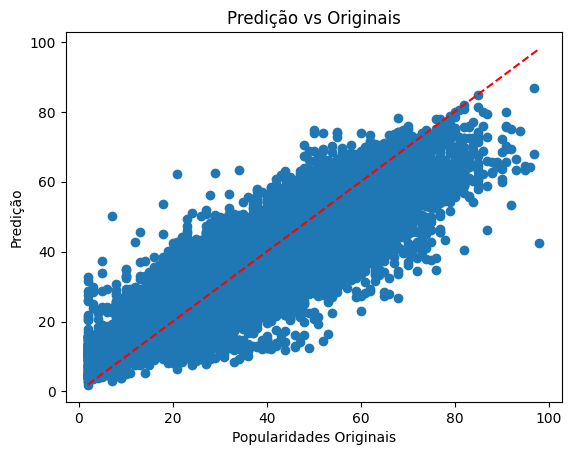

In [121]:

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Popularidades Originais')
plt.ylabel('Predição')
plt.title('Predição vs Originais')
plt.show()

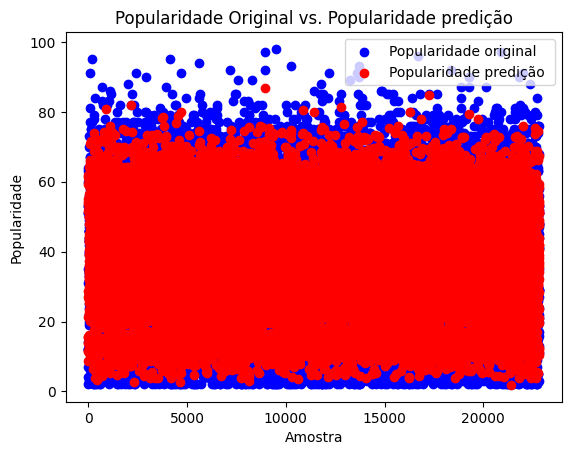

In [123]:
fig, ax = plt.subplots()

# Plotar os valores de y_test em azul (Popularidades originais )
ax.scatter(range(len(y_test)), y_test, color='blue', label='Popularidade original')

# Plotar os valores de y_pred em vermelho (predição)
ax.scatter(range(len(y_pred)), y_pred, color='red', label='Popularidade predição ')



ax.set_xlabel('Amostra')
ax.set_ylabel('Popularidade')
ax.set_title('Popularidade Original vs. Popularidade predição')
ax.legend()
plt.show()



